# **Customer Churn Data**

Understand Your Problem:

Goal: Predict customer churn (binary classification: churn/no churn).

Data Type: Tabular data

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.base import clone
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report,accuracy_score, recall_score, precision_score, f1_score, RocCurveDisplay
from matplotlib.gridspec import GridSpec
from tabulate import tabulate
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from IPython.display import clear_output

warnings.filterwarnings("ignore")

## Read Files

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
print('The Shape Of Data Is ==> ', df.shape)

The Shape Of Data Is ==>  (10000, 14)


In [ ]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [ ]:
df.describe(include = 'object')

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

## visualization methods & Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Surname'] = le.fit_transform(df['Surname'])

In [ ]:
df.head(3)

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602     1115          619          0       0   42   
1          2    15647311     1177          608          2       0   41   
2          3    15619304     2040          502          0       0   42   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1

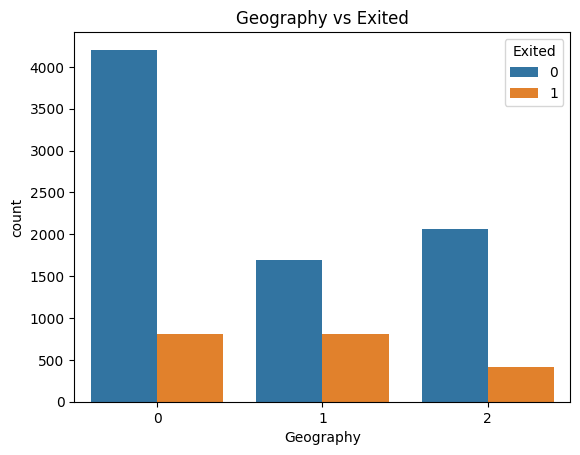

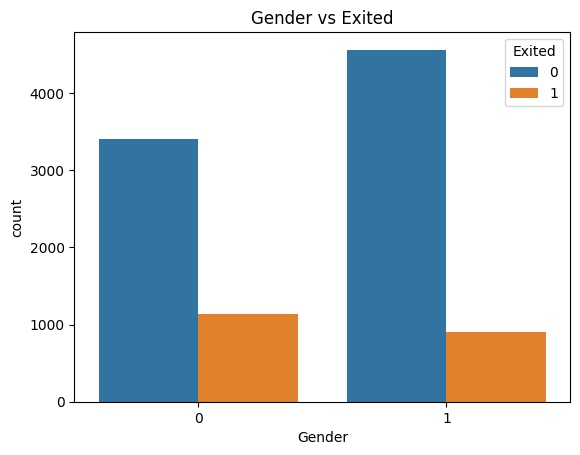

In [ ]:
# Count plot for categorical features
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title('Geography vs Exited')
plt.show()

sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Gender vs Exited')
plt.show()

Region 0 has the highest customer retention, while regions 1 and 2 have higher exit rates proportionally.
A higher percentage of males (Gender = 1) are retained compared to females (Gender = 0).

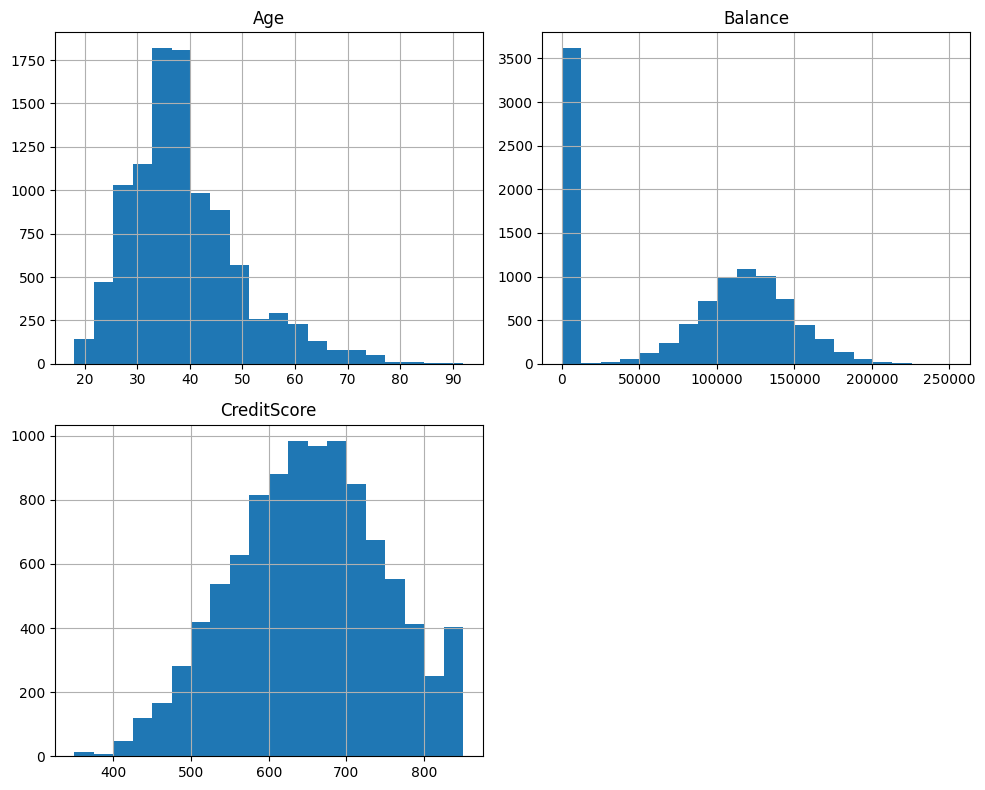

In [ ]:
# Histogram for numerical features
df[['Age', 'Balance', 'CreditScore']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

Customers who exited tend to be older than those who stayed.Age as a feature in your model since it correlates strongly with churn. scaling Age (e.g., Min-Max Scaling or Standardization) , The credit score is normally distributed.


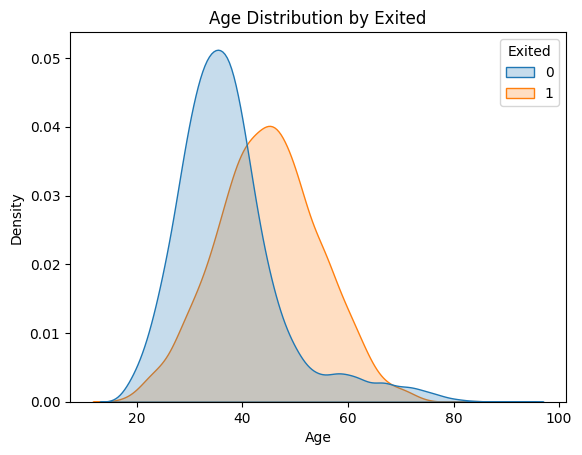

In [ ]:
sns.kdeplot(data=df, x='Age', hue='Exited', fill=True, common_norm=False)
plt.title('Age Distribution by Exited')
plt.show()

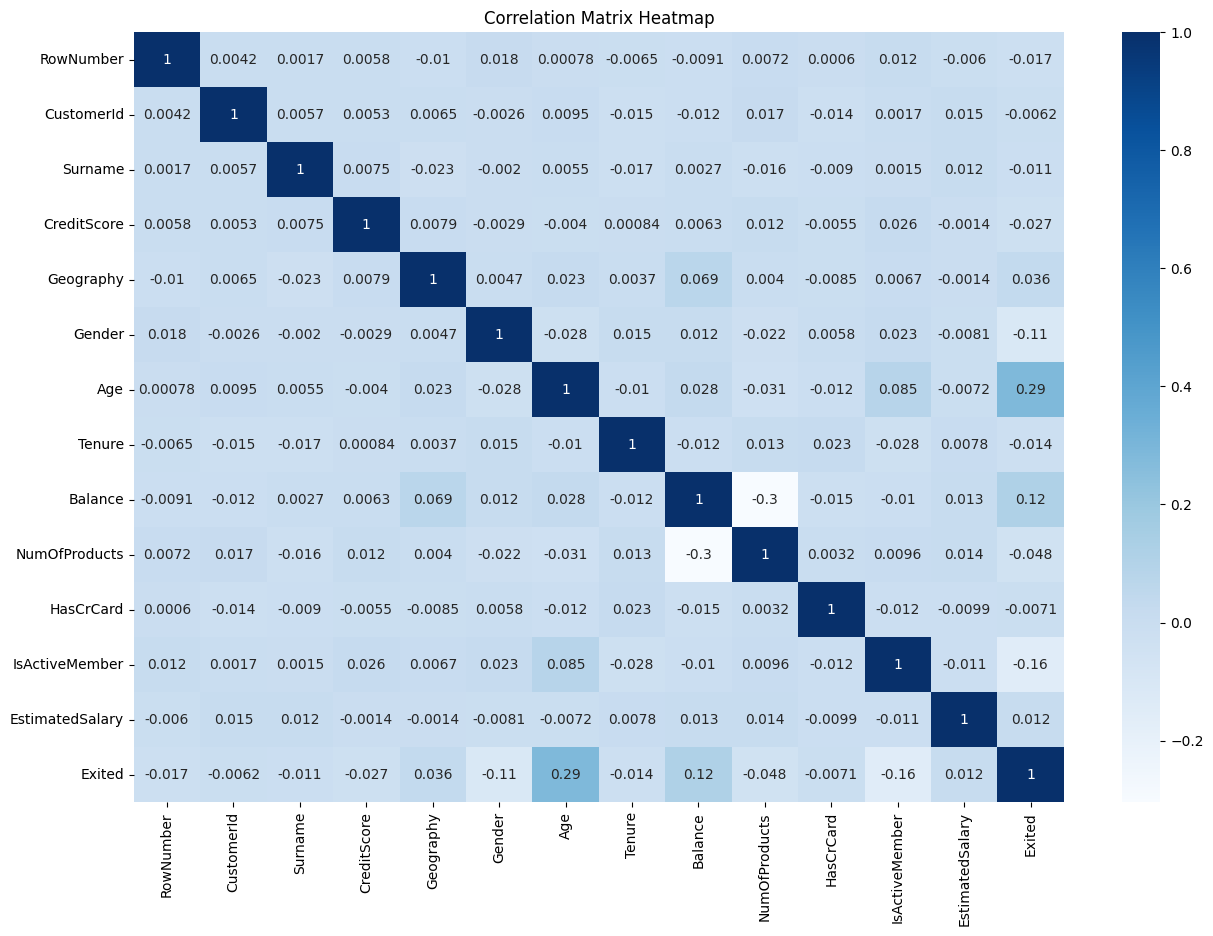

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
corr_matrix

RowNumber  CustomerId   Surname  CreditScore  Geography  \
RowNumber         1.000000    0.004202  0.001682     0.005840  -0.010358   
CustomerId        0.004202    1.000000  0.005689     0.005308   0.006516   
Surname           0.001682    0.005689  1.000000     0.007489  -0.022878   
CreditScore       0.005840    0.005308  0.007489     1.000000   0.007888   
Geography        -0.010358    0.006516 -0.022878     0.007888   1.000000   
Gender            0.018196   -0.002641 -0.002049    -0.002857   0.004719   
Age               0.000783    0.009497  0.005550    -0.003965   0.022812   
Tenure           -0.006495   -0.014883 -0.017412     0.000842   0.003739   
Balance          -0.009067   -0.012419  0.002657     0.006268   0.069408   
NumOfProducts     0.007246    0.016972 -0.016460     0.012238   0.003972   
HasCrCard         0.000599   -0.014025 -0.008993    -0.005458  -0.008523   
IsActiveMember    0.012044    0.001665  0.001483     0.025651   0.006724   
EstimatedSalary  -0.005988    0.015271  0.011850    -0.001384  -0.001369   
Exited           -0.016571   -0.006248 -0.010822    -0.027094   0.035943   

                   Gender       Age    Tenure   Balance  NumOfProducts  \
RowNumber        0.018196  0.000783 -0.006495 -0.009067       0.007246   
CustomerId      -0.002641  0.009497 -0.014883 -0.012419       0.016972   
Surname         -0.002049  0.005550 -0.017412  0.002657      -0.016460   
CreditScore     -0.002857 -0.003965  0.000842  0.006268       0.012238   
Geography        0.004719  0.022812  0.003739  0.069408       0.003972   
Gender           1.000000 -0.027544  0.014733  0.012087      -0.021859   
Age             -0.027544  1.000000 -0.009997  0.028308      -0.030680   
Tenure           0.014733 -0.009997  1.000000 -0.012254       0.013444   
Balance          0.012087  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts   -0.021859 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard        0.005766 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember   0.022544  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary -0.008112 -0.007201  0.007784  0.012797       0.014204   
Exited          -0.106512  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
RowNumber         0.000599        0.012044        -0.005988 -0.016571  
CustomerId       -0.014025        0.001665         0.015271 -0.006248  
Surname          -0.008993        0.001483         0.011850 -0.010822  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Geography        -0.008523        0.006724        -0.001369  0.035943  
Gender            0.005766        0.022544        -0.008112 -0.106512  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

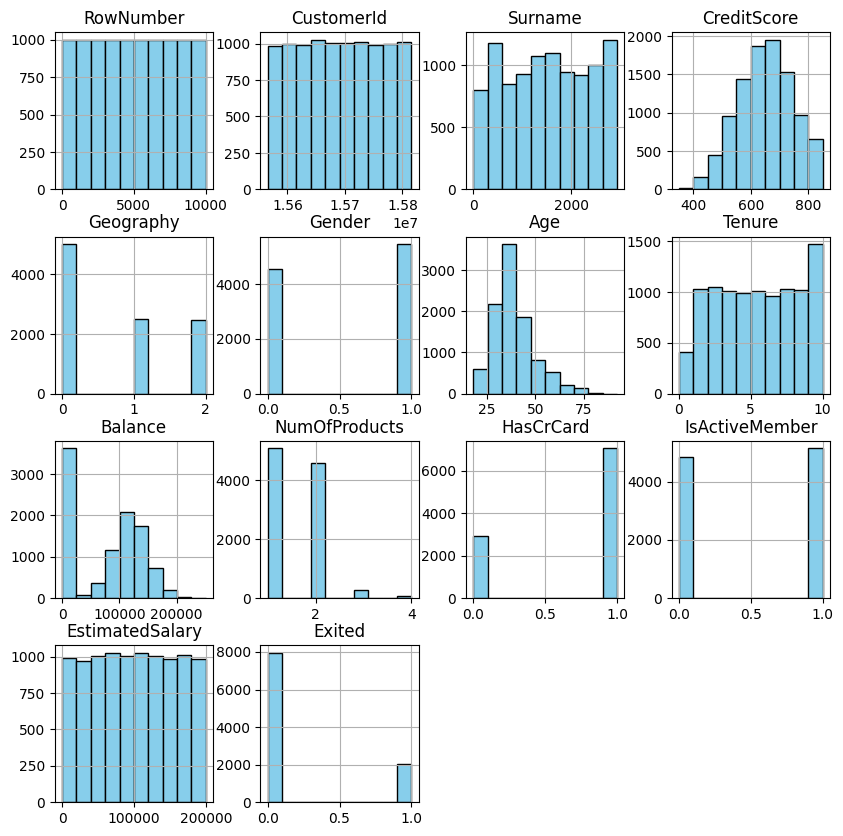

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10) , color='skyblue', edgecolor='black')
plt.show()

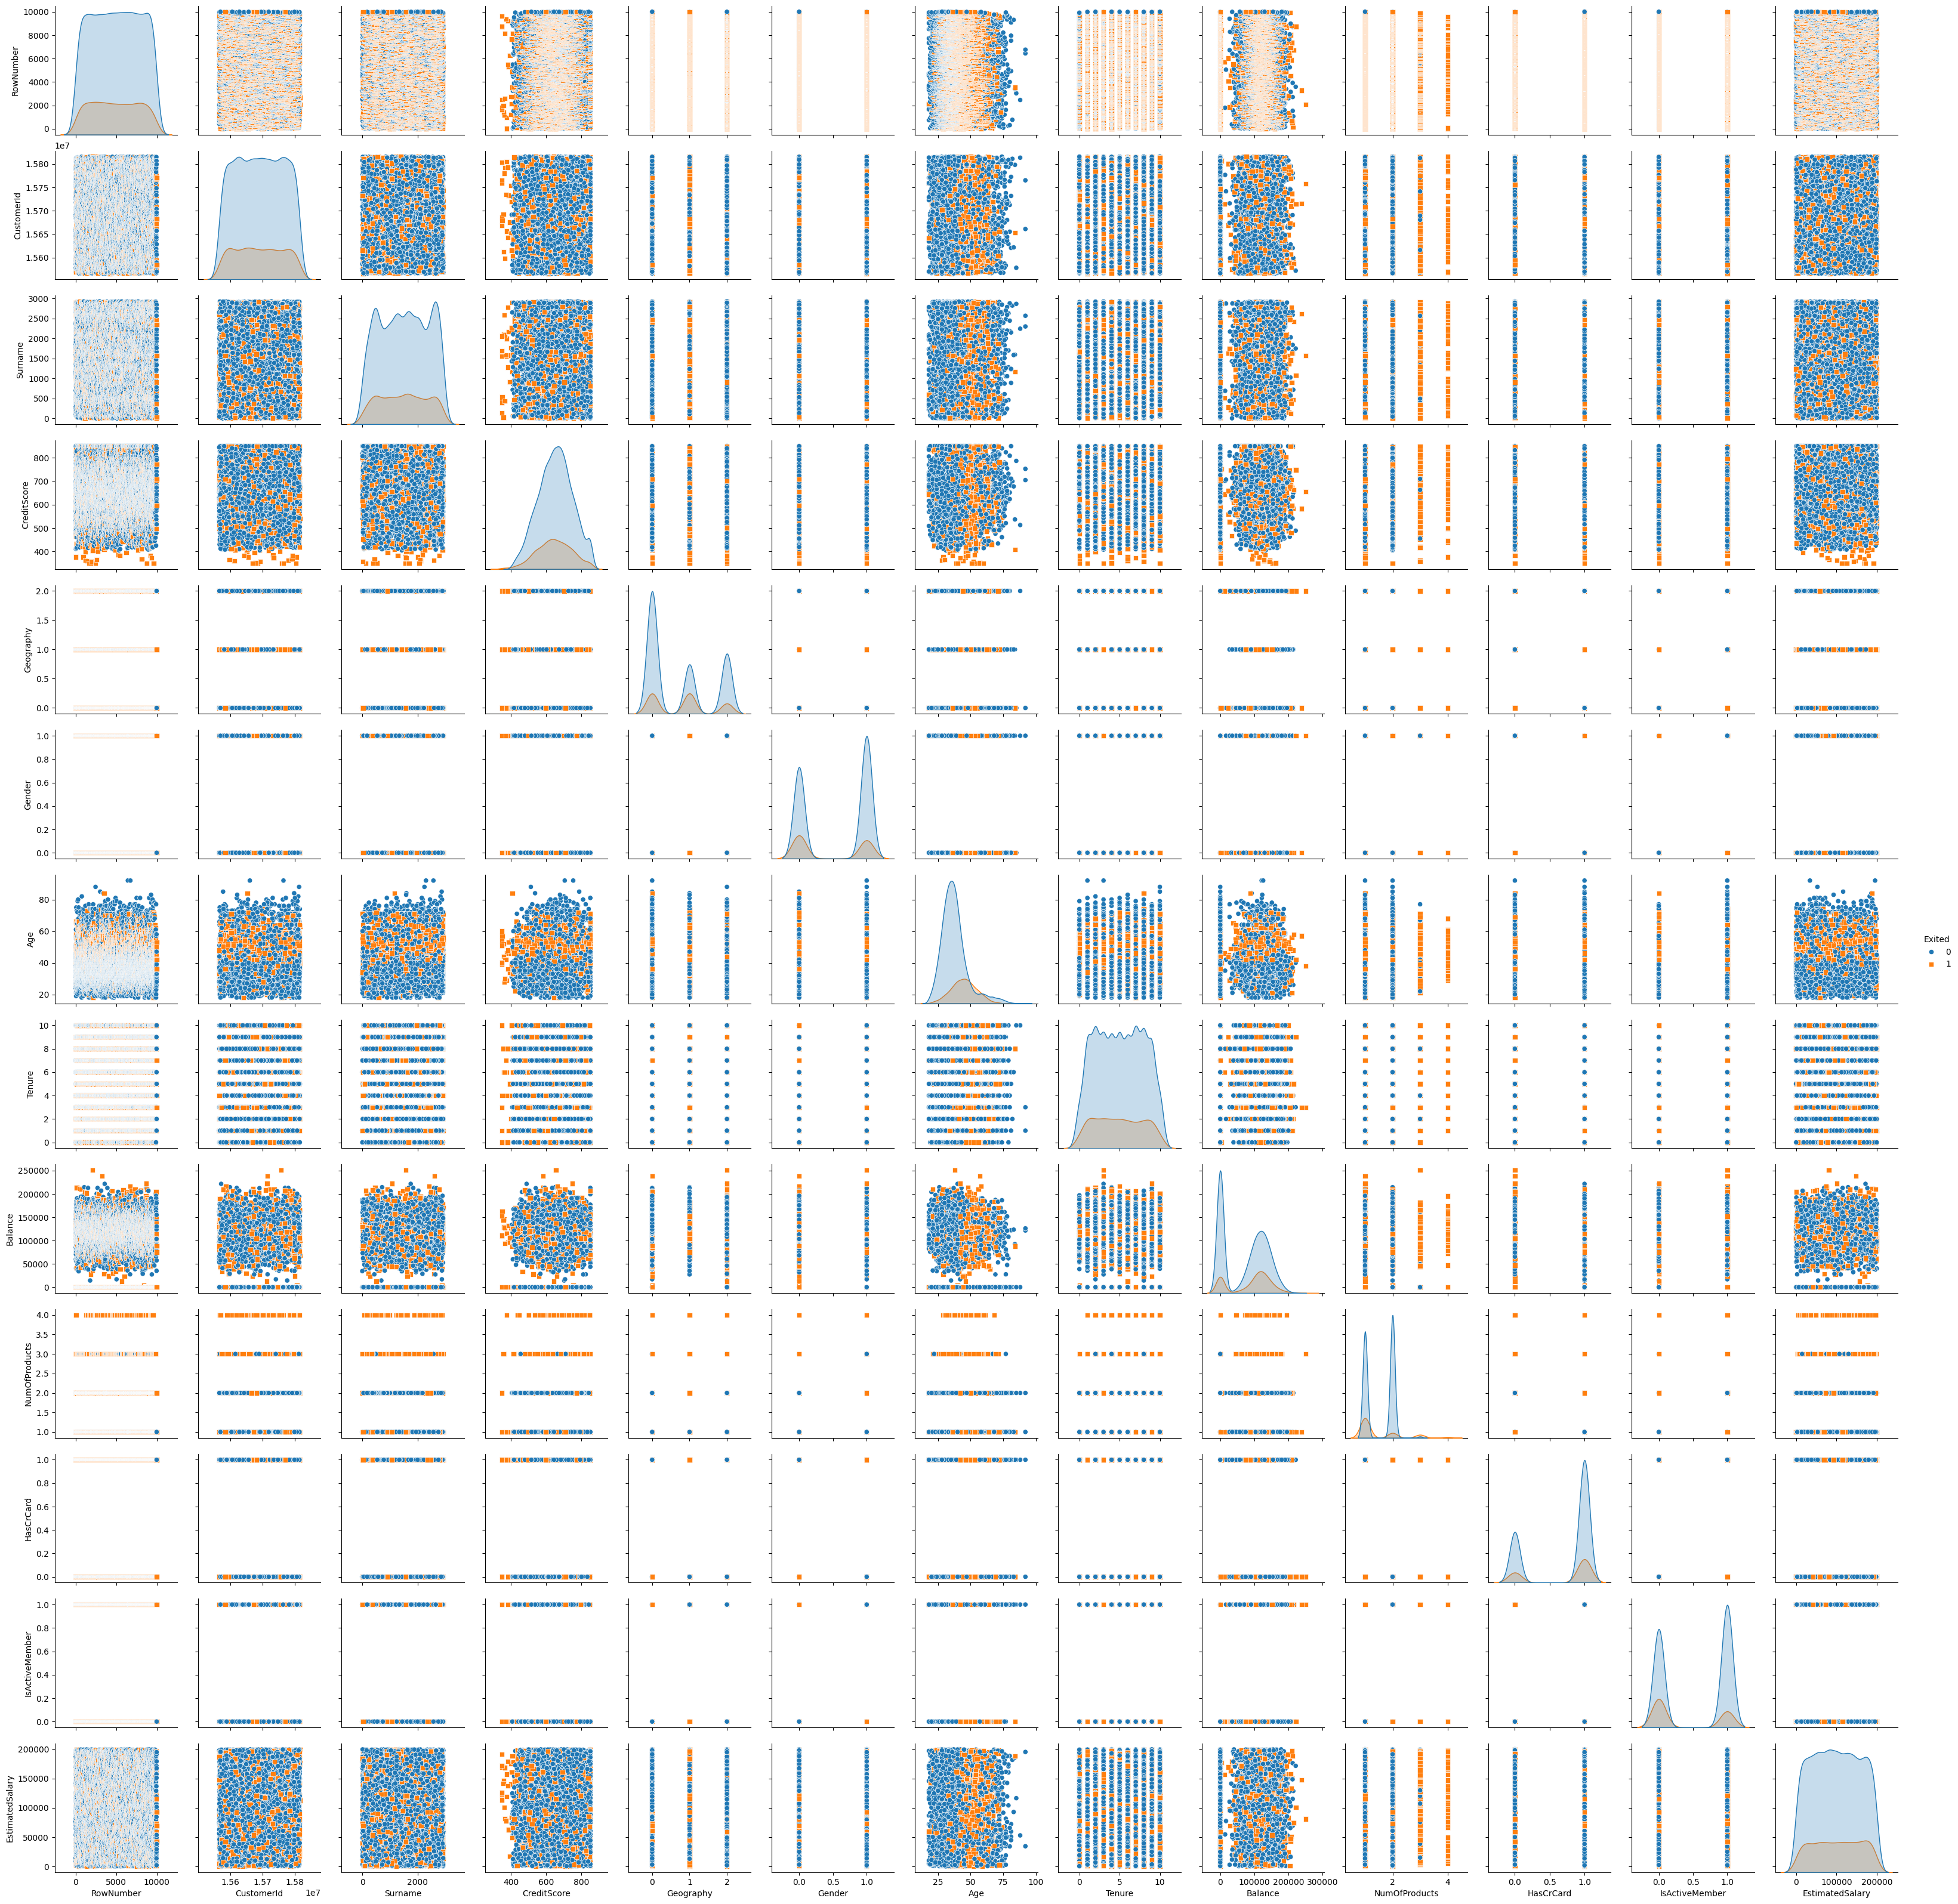

In [ ]:
sns.pairplot(df, hue='Exited', diag_kind='kde', markers=["o", "s"])
plt.show()

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Model_1_Logistic Regression: A good baseline model for binary classification

In [ ]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
LR = LogisticRegression()
LR.fit(x1_train, y1_train)
print('Training Accuracy : ', LR.score(x1_train, y1_train))
print('Testing Accuracy : ', LR.score(x1_test, y1_test))

Training Accuracy :  0.807375
Testing Accuracy :  0.8155


In [ ]:
y_pred_1 = LR.predict(x1_test)
print(classification_report(y1_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.72      0.57      0.58      2000
weighted avg       0.78      0.82      0.77      2000



**Selection: Given the mix of continuous and categorical features, and the need to handle non-linear relationships, class imbalance, high dimensionality consider models like:**

**Random Forests: Robust to non-linearity and handles categorical features well.**

**Gradient Boosting Machines (XGBoost, LightGBM, CatBoost): High performance, handle non-linearity and categorical features.**



## Model_2

In [ ]:
#  Tenure , 'CreditScore', 'HasCrCard', 'EstimatedSalary'
df.drop(columns=['RowNumber', 'CustomerId',	'Surname' ], inplace=True)

In [ ]:
df.head(2)

CreditScore  Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619          0       0   42       2      0.00              1   
1          608          2       0   41       1  83807.86              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Train models
rf = RandomForestClassifier(random_state=42)
rf.fit(x2_train, y2_train)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(x2_train, y2_train)

svc = SVC(probability=True, random_state=42)
svc.fit(x2_train, y2_train)

# Evaluate all models
models = {'Random Forest': rf, 'Gradient Boosting': gb, 'SVC': svc}
for name, model in models.items():
    y_pred2 = model.predict(x2_test)
    print(f"Model: {name}")
    print(classification_report(y2_test, y_pred2))
    print()

Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000


Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000


Model: SVC
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.80      0.37      0.50       393

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg   

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(x2_train, y2_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 0.8633


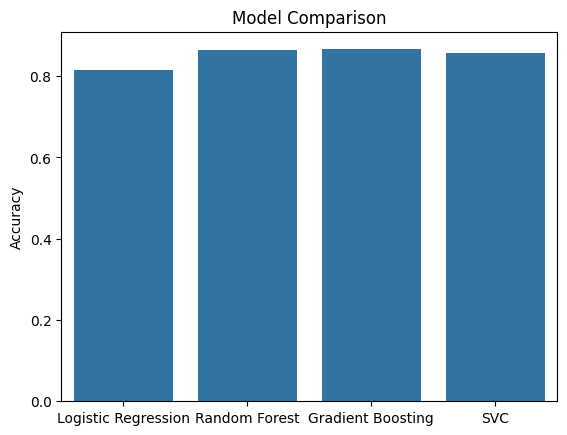

In [ ]:
import numpy as np

# Accuracy scores
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVC']
accuracies = [
    LR.score(x1_test, y1_test),
    rf.score(x2_test, y2_test),
    gb.score(x2_test, y2_test),
    svc.score(x2_test, y2_test),
]

sns.barplot(x=model_names, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.show()


## Use SMOTE

In [ ]:
x3_train , x3_test , y3_train , y3_test = train_test_split(X , y , test_size= 0.2 , random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto' , random_state=42)

x3_train_resampled, y3_train_resampled = smote.fit_resample(x3_train, y3_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=200, max_depth = 20, min_samples_split = 10  , random_state=42)
RF.fit(x3_train_resampled, y3_train_resampled)
print('Training Accuracy : ', RF.score(x3_train_resampled, y3_train_resampled))
print('Testing Accuracy : ', RF.score(x3_test, y3_test))

Training Accuracy :  0.973882945248584
Testing Accuracy :  0.8395


In [ ]:
y_pred_3 = RF.predict(x3_test)
print(classification_report(y3_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.59      0.63      0.61       393

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.84      0.84      0.84      2000

